**Change in temperature**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Packages form Henriks Github
from lammps_logfile import running_mean, get_color_value
from regex_file_collector import Collector
from regex_file_collector.utils import floating_number_pattern
import lammps_logfile

**Save figure**

In [2]:
def save_figure(output_file_name):
    plt.savefig(output_file_name, dpi=None, facecolor='w', edgecolor='w', orientation='portrait')

**Load files**

In [14]:
paths = ['/home/users/marthgg/2021_10_change_temp/crack_simulation_deformZ_320.000000/fracture_displacement.npy',
         '/home/users/marthgg/2021_10_change_temp/crack_simulation_deformZ_550.000000/fracture_displacement.npy',
         '/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.029000/fracture_displacement.npy']#,
         #'/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.023591/fracture_displacement.npy',
         #'/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.027194/fracture_displacement.npy']

logfile_folders = ['/home/users/marthgg/2021_10_change_temp/crack_simulation_deformZ_320.000000/log.lammps',
                   '/home/users/marthgg/2021_10_change_temp/crack_simulation_deformZ_550.000000/log.lammps',
                   '/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.029000/log.lammps']
                   #'/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.023591/log.lammps',
                   #'/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.027194/log.lammps']

temp = [320.000000, 550.000000, 300, 300, 300]

/home/users/marthgg/2021_10_change_temp/crack_simulation_deformZ_320.000000/fracture_displacement.npy
39
/home/users/marthgg/2021_10_change_temp/crack_simulation_deformZ_320.000000/log.lammps
/home/users/marthgg/2021_10_change_temp/crack_simulation_deformZ_550.000000/log.lammps
/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.029000/fracture_displacement.npy
41
/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.029000/log.lammps


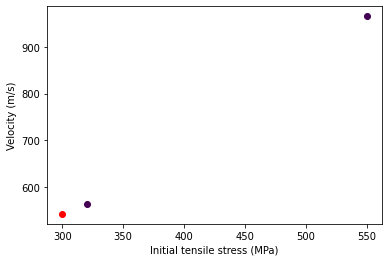

In [19]:
system_length = 3000
crack_start_point = 150

k = 0

for path in paths:
        
    filename = path

    data = np.load(filename, allow_pickle=False)
    frames = list(range(0, len(data)))

    filtered_data_crackTip = []
    filtered_data_frames   = []

    for i in range(0, len(data)):
        if data[i] > crack_start_point and data[i] < system_length:
            filtered_data_crackTip.append(data[i])
            filtered_data_frames.append(frames[i])            
    
    for i in range(0, len(filtered_data_frames)):
        if filtered_data_crackTip[i] > 2910:
            print(filename)
            print(filtered_data_frames[i])
            break

    # Find velocity
    timestep = 0.001 # ps
    dump_frequency = 10000

    time_s = []
    time = []
    for i in range(0, len(filtered_data_frames)):
        time.append(filtered_data_frames[i]*timestep*dump_frequency) #Time in ps
        if filtered_data_crackTip[i] < 2910:
            time_s.append(filtered_data_frames[i]*timestep*dump_frequency*(10**-12)) #time in s

    position_m = []
    for i in range(0, len(filtered_data_crackTip)):
        if filtered_data_crackTip[i] < 2910:
            position_m.append(filtered_data_crackTip[i]*(10**-10)) #distance in m

    velocity = np.diff(position_m)/np.diff(time_s)
    mean_velocity = np.mean(velocity)
    
    logfile = logfile_folders[k]
    print(logfile)
    log = lammps_logfile.File(logfile)
    pzz = log.get('Pzz')
    min_pressure = np.min(pzz)
    
    
    if temp[k] == 300:
        plt.figure(1)
        plt.plot(temp[k], mean_velocity, 'ro')
        plt.xlabel('Initial tensile stress (MPa)')
        plt.ylabel('Velocity (m/s)')
        
        #save_figure('/home/users/marthgg/2021_11_figures/vary_temp.ps')
    
    else:
        plt.figure(1)
        plt.plot(temp[k], mean_velocity, 'o', color=get_color_value(float(temp[k]), 560, 570))
        plt.xlabel('Initial tensile stress (MPa)')
        plt.ylabel('Velocity (m/s)')
        
        #save_figure('/home/users/marthgg/2021_11_figures/vary_temp.ps')
    
    k += 1